In [1]:
import sqlite3
import pandas as pd

In [2]:
db_path = "MIG_Cement_Records.db"
conn = sqlite3.connect(db_path)

cursor = conn.cursor()

In [3]:
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print('Tables:', tables)

Tables: [('Sites',), ('CementTypes',), ('Operations',)]


In [4]:
for table_name, in tables:
    print(f'==== {table_name} ====')

    schema = cursor.execute(f"PRAGMA table_info({table_name});").fetchall()
    print("Schema:", schema)

==== Sites ====
Schema: [(0, 'site_id', 'TEXT', 0, None, 1), (1, 'region', 'TEXT', 0, None, 0), (2, 'silo_capacity', 'INTEGER', 0, None, 0), (3, 'behavior', 'TEXT', 0, None, 0)]
==== CementTypes ====
Schema: [(0, 'cement_type', 'TEXT', 0, None, 1)]
==== Operations ====
Schema: [(0, 'date', 'TEXT', 0, None, 0), (1, 'site_id', 'TEXT', 0, None, 0), (2, 'cement_type', 'TEXT', 0, None, 0), (3, 'planned_pour_tonnes', 'REAL', 0, None, 0), (4, 'consumed_tonnes', 'REAL', 0, None, 0), (5, 'opening_inventory_tonnes', 'REAL', 0, None, 0), (6, 'deliveries_tonnes', 'REAL', 0, None, 0), (7, 'closing_inventory_tonnes', 'REAL', 0, None, 0), (8, 'rain_mm', 'REAL', 0, None, 0), (9, 'avg_temp_c', 'REAL', 0, None, 0), (10, 'silo_capacity', 'INTEGER', 0, None, 0)]


In [5]:
for table_name, in tables:
    print(f'==== {table_name} ====')

    rows = cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;").fetchall()
    print("Sample rows:", rows)

==== Sites ====
Sample rows: [('SITE_001', 'North', 448, 'aggressive'), ('SITE_002', 'South', 288, 'conservative'), ('SITE_003', 'East', 314, 'aggressive'), ('SITE_004', 'South', 472, 'conservative'), ('SITE_005', 'South', 230, 'aggressive')]
==== CementTypes ====
Sample rows: [('CEM_I',), ('CEM_II',), ('CEM_III',)]
==== Operations ====
Sample rows: [('2022-01-01', 'SITE_001', 'CEM_II', 43.18, 34.54, 52.56, 45.83, 63.85, 3.4, -3.1, 448), ('2022-01-02', 'SITE_001', 'CEM_I', 45.26, 45.26, 63.85, 19.97, 38.56, 3.23, 14.28, 448), ('2022-01-03', 'SITE_001', 'CEM_III', 38.69, 38.69, 38.56, 47.19, 47.06, 2.64, 6.4, 448), ('2022-01-04', 'SITE_001', 'CEM_I', 33.16, 33.16, 47.06, 18.74, 32.64, 8.25, 14.23, 448), ('2022-01-05', 'SITE_001', 'CEM_III', 56.88, 47.04, 32.64, 14.4, 0.0, 2.69, 8.97, 448)]


In [6]:
query = """
SELECT
    o.date,
    o.site_id,
    s.region,
    s.behavior,
    o.cement_type,
    o.planned_pour_tonnes,
    o.consumed_tonnes,
    o.opening_inventory_tonnes,
    o.deliveries_tonnes,
    o.closing_inventory_tonnes,
    o.rain_mm,
    o.avg_temp_c,
    o.silo_capacity
FROM Operations o
JOIN Sites s on o.site_id = s.site_id
"""

In [7]:
df = pd.read_sql_query(query, conn)

In [8]:
df.head()

,date,site_id,region,behavior,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity
0,2022-01-01,SITE_001,North,aggressive,CEM_II,43.18,34.54,52.56,45.83,63.85,3.40,-3.10,448
1,2022-01-02,SITE_001,North,aggressive,CEM_I,45.26,45.26,63.85,19.97,38.56,3.23,14.28,448
2,2022-01-03,SITE_001,North,aggressive,CEM_III,38.69,38.69,38.56,47.19,47.06,2.64,6.40,448
3,2022-01-04,SITE_001,North,aggressive,CEM_I,33.16,33.16,47.06,18.74,32.64,8.25,14.23,448
4,2022-01-05,SITE_001,North,aggressive,CEM_III,56.88,47.04,32.64,14.40,0.00,2.69,8.97,448


In [9]:
conn.close()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      32880 non-null  object 
 1   site_id                   32880 non-null  object 
 2   region                    32880 non-null  object 
 3   behavior                  32880 non-null  object 
 4   cement_type               32880 non-null  object 
 5   planned_pour_tonnes       32880 non-null  float64
 6   consumed_tonnes           32880 non-null  float64
 7   opening_inventory_tonnes  32880 non-null  float64
 8   deliveries_tonnes         32880 non-null  float64
 9   closing_inventory_tonnes  32880 non-null  float64
 10  rain_mm                   32880 non-null  float64
 11  avg_temp_c                32880 non-null  float64
 12  silo_capacity             32880 non-null  int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 3.3+ MB


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      32880 non-null  datetime64[ns]
 1   site_id                   32880 non-null  object        
 2   region                    32880 non-null  object        
 3   behavior                  32880 non-null  object        
 4   cement_type               32880 non-null  object        
 5   planned_pour_tonnes       32880 non-null  float64       
 6   consumed_tonnes           32880 non-null  float64       
 7   opening_inventory_tonnes  32880 non-null  float64       
 8   deliveries_tonnes         32880 non-null  float64       
 9   closing_inventory_tonnes  32880 non-null  float64       
 10  rain_mm                   32880 non-null  float64       
 11  avg_temp_c                32880 non-null  float64       
 12  silo_capacity     

In [13]:
df.isnull().sum()

date                        0
site_id                     0
region                      0
behavior                    0
cement_type                 0
planned_pour_tonnes         0
consumed_tonnes             0
opening_inventory_tonnes    0
deliveries_tonnes           0
closing_inventory_tonnes    0
rain_mm                     0
avg_temp_c                  0
silo_capacity               0
dtype: int64

In [14]:
df.columns.tolist()

['date',
 'site_id',
 'region',
 'behavior',
 'cement_type',
 'planned_pour_tonnes',
 'consumed_tonnes',
 'opening_inventory_tonnes',
 'deliveries_tonnes',
 'closing_inventory_tonnes',
 'rain_mm',
 'avg_temp_c',
 'silo_capacity']

In [15]:
numeric_cols = [
 'planned_pour_tonnes',
 'consumed_tonnes',
 'opening_inventory_tonnes',
 'deliveries_tonnes',
 'closing_inventory_tonnes',
 'rain_mm',
 'avg_temp_c',
 'silo_capacity']

(df[numeric_cols] < 0).sum()

planned_pour_tonnes            0
consumed_tonnes                0
opening_inventory_tonnes       0
deliveries_tonnes              0
closing_inventory_tonnes       0
rain_mm                        0
avg_temp_c                  4551
silo_capacity                  0
dtype: int64

In [16]:
df['inventory_check'] = (
    df['opening_inventory_tonnes'] + df['deliveries_tonnes'] - df['consumed_tonnes']
).round(2) == df['closing_inventory_tonnes'].round(2)

In [17]:
df['inventory_check'].mean()

0.999787104622871

In [18]:
df['stockout'] = df['planned_pour_tonnes'] > (df['opening_inventory_tonnes'] + df['deliveries_tonnes'])

In [19]:
df['overcapacity'] = df['closing_inventory_tonnes'] > df['silo_capacity']

In [20]:
df['idle'] = (df['planned_pour_tonnes'] == 0) & (df['deliveries_tonnes'] == 0)

In [21]:
df['waste_risk'] = (df['closing_inventory_tonnes'] > 0.85 * df['silo_capacity']) & (df['planned_pour_tonnes'] < 5)

In [22]:
df['pour_disrupt'] = (df['planned_pour_tonnes'] > 0) & (df['consumed_tonnes'] == 0)

In [23]:
kpi_summary = df.groupby('site_id').agg(
    total_days=('date', 'count'),
    total_consumed_tonnes=('consumed_tonnes', 'sum'),
    avg_daily_consumed=('consumed_tonnes', 'mean'),
    stockout_pct=('stockout', lambda x: round(x.mean() * 100, 2)),
    overcapacity_pct=('overcapacity', lambda x: round(x.mean() * 100, 2)),
    idle_pct=('idle', lambda x: round(x.mean() * 100, 2)),
    waste_risk_pct=('waste_risk', lambda x: round(x.mean() * 100, 2)),
    pour_disrupt_pct=('pour_disrupt', lambda x: round(x.mean() * 100, 2)),
    silo_capacity=('silo_capacity', 'first'),
    region=('region', 'first')
).reset_index()

In [24]:
kpi_summary

,site_id,total_days,total_consumed_tonnes,avg_daily_consumed,stockout_pct,overcapacity_pct,idle_pct,waste_risk_pct,pour_disrupt_pct,silo_capacity,region
0,SITE_001,1096,33056.40,30.160949,55.75,0.00,0.00,0.00,4.84,448,North
1,SITE_002,1096,12900.44,11.770474,0.00,98.81,0.00,3.56,0.00,288,South
2,SITE_003,1096,32520.09,29.671615,54.38,0.00,0.00,0.00,5.75,314,East
3,SITE_004,1096,12618.50,11.513230,0.00,98.08,0.00,4.93,0.00,472,South
4,SITE_005,1096,32935.68,30.050803,56.93,0.00,0.00,0.00,4.38,230,South
5,SITE_006,1096,28601.16,26.095949,16.15,0.00,2.55,0.09,3.47,443,East
6,SITE_007,1096,32607.65,29.751505,57.03,0.00,0.00,0.00,5.20,485,East
7,SITE_008,1096,32689.50,29.826186,60.49,0.00,0.00,0.00,4.47,260,West
8,SITE_009,1096,12735.31,11.619808,0.00,98.81,0.00,4.29,0.00,352,East
9,SITE_010,1096,33579.76,30.638467,57.03,0.00,0.00,0.00,4.56,158,West


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

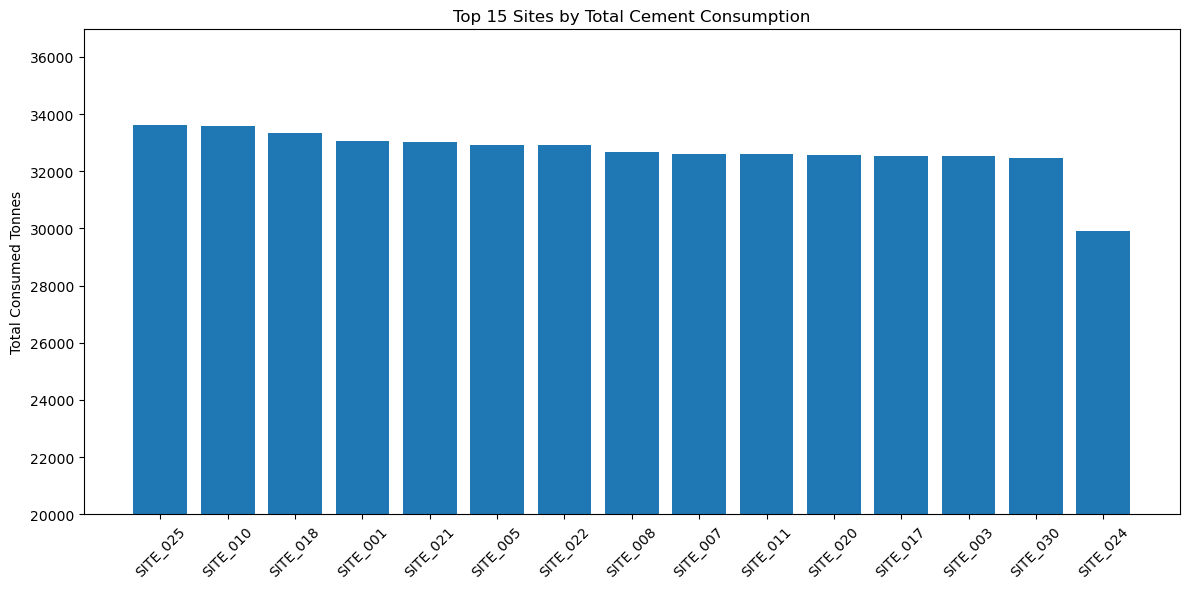

In [26]:
top_sites = kpi_summary.sort_values('total_consumed_tonnes', ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.bar(top_sites['site_id'], top_sites['total_consumed_tonnes'])
plt.title('Top 15 Sites by Total Cement Consumption')
plt.xticks(rotation=45)
plt.ylim(20000, top_sites['total_consumed_tonnes'].max() * 1.1)
plt.ylabel('Total Consumed Tonnes')
plt.tight_layout()
plt.show()

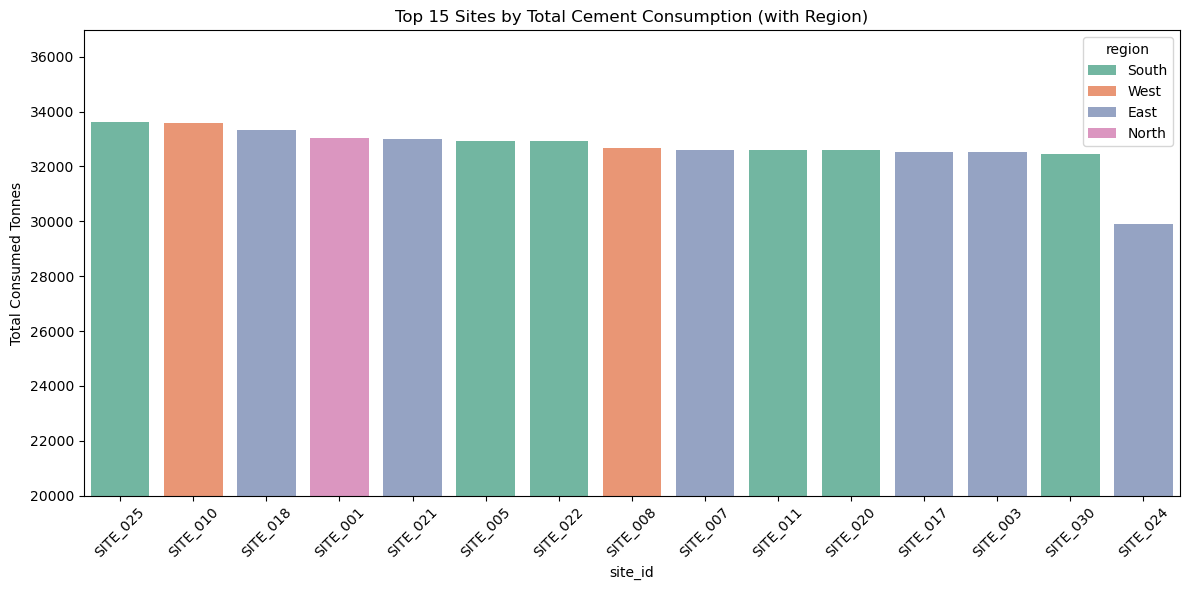

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='site_id', y='total_consumed_tonnes', data=top_sites, hue='region', dodge=False, palette='Set2')
plt.title('Top 15 Sites by Total Cement Consumption (with Region)')
plt.xticks(rotation=45)
plt.ylim(20000, top_sites['total_consumed_tonnes'].max() * 1.1)
plt.ylabel('Total Consumed Tonnes')
plt.tight_layout()
plt.show()

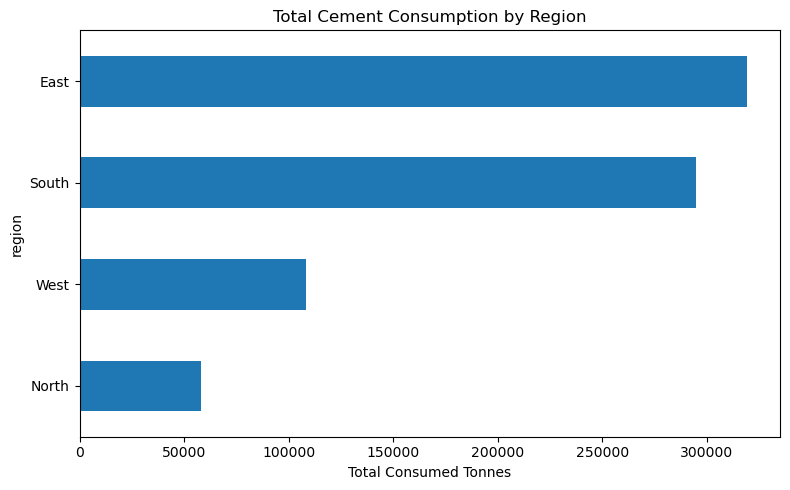

In [28]:
region_consumption = df.groupby('region')['consumed_tonnes'].sum().sort_values()
region_consumption.plot(kind='barh', figsize=(8,5), title='Total Cement Consumption by Region')
plt.xlabel('Total Consumed Tonnes')
plt.tight_layout()
plt.show()

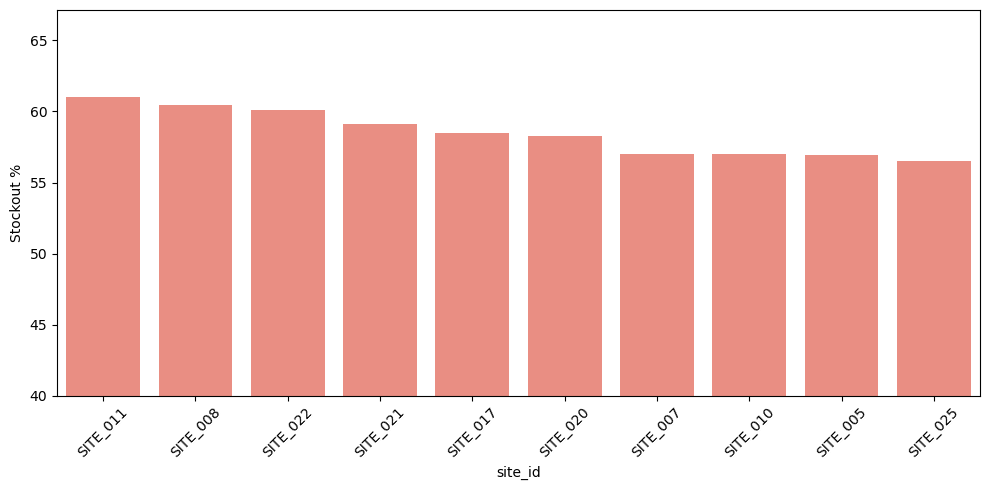

In [29]:
stockout_sites = kpi_summary.sort_values('stockout_pct', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='site_id', y='stockout_pct', data=stockout_sites, color='salmon')
plt.xticks(rotation=45)
plt.ylim(40, stockout_sites['stockout_pct'].max() * 1.1)
plt.ylabel('Stockout %')
plt.tight_layout()
plt.show()

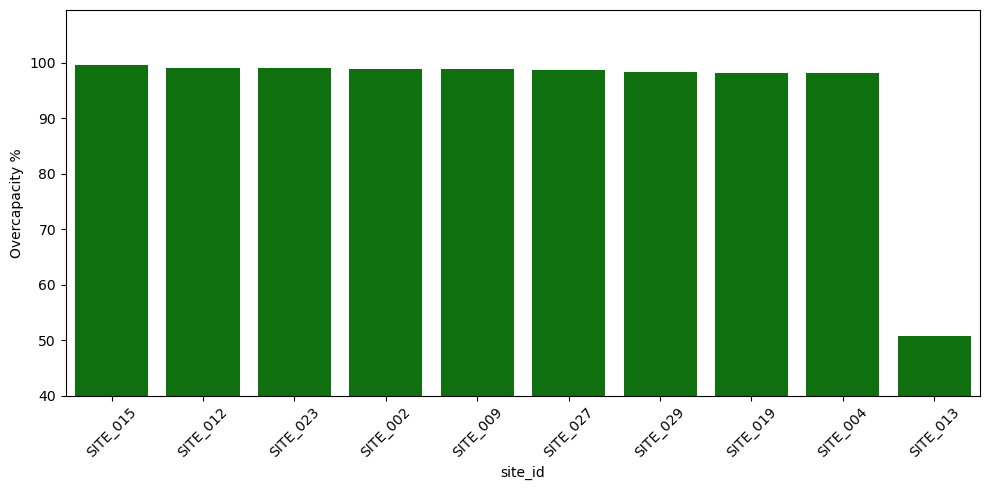

In [30]:
overcapacity_sites = kpi_summary.sort_values('overcapacity_pct', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='site_id', y='overcapacity_pct', data=overcapacity_sites, color='Green')
plt.xticks(rotation=45)
plt.ylim(40, overcapacity_sites['overcapacity_pct'].max() * 1.1)
plt.ylabel('Overcapacity %')
plt.tight_layout()
plt.show()

In [31]:
df.head()

,date,site_id,region,behavior,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity,inventory_check,stockout,overcapacity,idle,waste_risk,pour_disrupt
0,2022-01-01,SITE_001,North,aggressive,CEM_II,43.18,34.54,52.56,45.83,63.85,3.40,-3.10,448,True,False,False,False,False,False
1,2022-01-02,SITE_001,North,aggressive,CEM_I,45.26,45.26,63.85,19.97,38.56,3.23,14.28,448,True,False,False,False,False,False
2,2022-01-03,SITE_001,North,aggressive,CEM_III,38.69,38.69,38.56,47.19,47.06,2.64,6.40,448,True,False,False,False,False,False
3,2022-01-04,SITE_001,North,aggressive,CEM_I,33.16,33.16,47.06,18.74,32.64,8.25,14.23,448,True,False,False,False,False,False
4,2022-01-05,SITE_001,North,aggressive,CEM_III,56.88,47.04,32.64,14.40,0.00,2.69,8.97,448,True,True,False,False,False,False


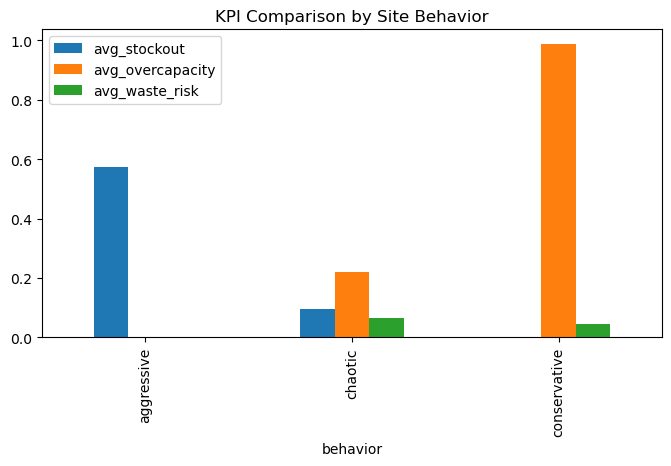

In [32]:
behaviot_kpi = df.groupby('behavior').agg(
    avg_stockout=('stockout', 'mean'),
    avg_overcapacity=('overcapacity', 'mean'),
    avg_waste_risk=('waste_risk', 'mean')
)

behaviot_kpi.plot(kind='bar', figsize=(8,4), title='KPI Comparison by Site Behavior');

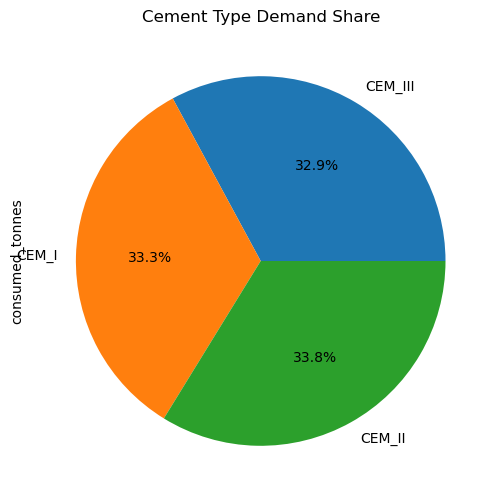

In [33]:
cement_demand = df.groupby('cement_type')['consumed_tonnes'].sum().sort_values()
cement_demand.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Cement Type Demand Share');

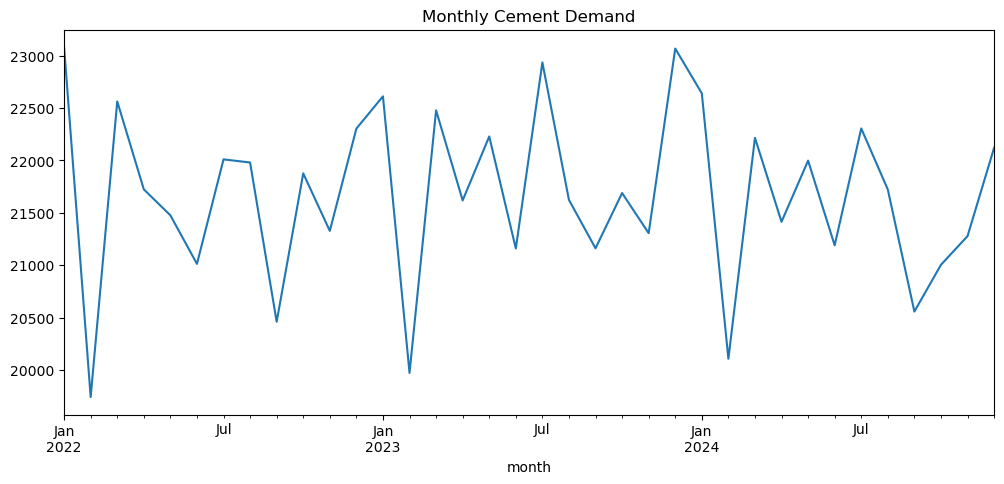

In [34]:
df['month'] = df['date'].dt.to_period('M')
month_demand = df.groupby('month')['consumed_tonnes'].sum()
month_demand.plot(figsize=(12,5), title='Monthly Cement Demand');

In [35]:
site_usage = df.groupby('site_id')['consumed_tonnes'].sum().sort_values(ascending=False)

In [36]:
total_usage = site_usage.sum()

top5 = site_usage.head(5)
top5_share = round(top5.sum() / total_usage * 100, 2)

print('Top % sites by cement usage')
print(top5)

print(f'these top 5 sites accounts for {top5_share}% of the total cement consumption')

Top % sites by cement usage
site_id
SITE_025    33604.06
SITE_010    33579.76
SITE_018    33348.09
SITE_001    33056.40
SITE_021    33009.68
Name: consumed_tonnes, dtype: float64
these top 5 sites accounts for 21.36% of the total cement consumption


# Modelling

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
site_id = 'SITE_001'
site_df = df[df['site_id'] == site_id].copy()

In [40]:
site_df.set_index('date', inplace=True)
site_df = site_df.sort_index()

In [41]:
site_df.head()

,site_id,region,behavior,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity,inventory_check,stockout,overcapacity,idle,waste_risk,pour_disrupt,month
date,,,,,,,,,,,,,,,,,,,
2022-01-01,SITE_001,North,aggressive,CEM_II,43.18,34.54,52.56,45.83,63.85,3.40,-3.10,448,True,False,False,False,False,False,2022-01
2022-01-02,SITE_001,North,aggressive,CEM_I,45.26,45.26,63.85,19.97,38.56,3.23,14.28,448,True,False,False,False,False,False,2022-01
2022-01-03,SITE_001,North,aggressive,CEM_III,38.69,38.69,38.56,47.19,47.06,2.64,6.40,448,True,False,False,False,False,False,2022-01
2022-01-04,SITE_001,North,aggressive,CEM_I,33.16,33.16,47.06,18.74,32.64,8.25,14.23,448,True,False,False,False,False,False,2022-01
2022-01-05,SITE_001,North,aggressive,CEM_III,56.88,47.04,32.64,14.40,0.00,2.69,8.97,448,True,True,False,False,False,False,2022-01


In [42]:
y = site_df['consumed_tonnes']

exog = site_df[['planned_pour_tonnes', 'rain_mm', 'avg_temp_c']]

In [43]:
split_index = int(len(site_df) * 0.8)
X_train, X_test = exog.iloc[:split_index], exog.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

order=(p,d,q)

seasonal_order=(P,D,Q,s)

In [44]:
model = SARIMAX(
    y_train,
    exog=X_train,
    order=(1,1,1),
    seasonal_order=(1,0,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                   consumed_tonnes   No. Observations:                  876
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -3381.155
Date:                           Sat, 28 Feb 2026   AIC                           6778.310
Time:                                   18:26:02   BIC                           6816.421
Sample:                               01-01-2022   HQIC                          6792.895
                                    - 05-25-2024                                         
Covariance Type:                             opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
planned_pour_tonnes     0.5504      0.039     14.239      0.000       0.475       0.626
rain_mm                -0.8606      0.067    -12.835      0.000      -0.992      -0.729
avg_temp_c              0.0497      0.052      0.962      0.336      -0.052       0.151
ar.L1                   0.0849      0.034      2.473      0.013       0.018       0.152
ma.L1                  -0.9970      0.004   -225.112      0.000      -1.006      -0.988
ar.S.L7                -0.0430      0.592     -0.073      0.942      -1.202       1.116
ma.S.L7                 0.0188      0.591      0.032      0.975      -1.140       1.177
sigma2                143.4096      8.812     16.275      0.000     126.139     160.681
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.97
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.43
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
sarimax_forecast = results.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test)

In [46]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name='Actual',
    line=dict(color='black')
))

fig.add_trace(go.Scatter(
    x=y_test.index,
    y=sarimax_forecast,
    mode='lines',
    name='Forecast',
    line=dict(color='blue')
))


fig.update_layout(
    title=f'SARIMAX Forecast Vs Actual - {site_id}',
    xaxis_title='Date',
    yaxis_title='Cement Consumed (Tonnes)',
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error

def print_metrics(y_true, y_pred, label):
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{label} - MAPE: {mape:.2f}%, RMSE: {rmse:.2f} tonnes')

In [48]:
print_metrics(y_test, sarimax_forecast, 'SARIMAX')

SARIMAX - MAPE: 36.17%, RMSE: 11.73 tonnes


In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
rf_forecast = rf.predict(X_test)

In [53]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name='Actual',
    line=dict(color='black')
))

fig.add_trace(go.Scatter(
    x=y_test.index,
    y=rf_forecast,
    mode='lines',
    name='Forecast',
    line=dict(color='red')
))


fig.update_layout(
    title=f'Random Forest Forecast Vs Actual - {site_id}',
    xaxis_title='Date',
    yaxis_title='Cement Consumed (Tonnes)',
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()

In [54]:
print_metrics(y_test, sarimax_forecast, 'SARIMAX')
print_metrics(y_test, rf_forecast, 'Random Forest')

SARIMAX - MAPE: 36.17%, RMSE: 11.73 tonnes
Random Forest - MAPE: 34.86%, RMSE: 10.59 tonnes


In [55]:
df['lag_1'] = df.groupby('site_id')['consumed_tonnes'].shift(1)
df['lag_3'] = df.groupby('site_id')['consumed_tonnes'].shift(3)
df['lag_7'] = df.groupby('site_id')['consumed_tonnes'].shift(7)

site          consumed_tonnes         lag_1           lag_3         lag_7
A                  100                 Nan             nan
A                  115                 100             nan
A                  98                  115             nan
A                  136                  98             100
A                  127                 136             115
A                   74                 127              98
A                   81                  74             136

In [56]:
df['rolling_mean_3'] = df.groupby('site_id')['consumed_tonnes'].rolling(3).mean().reset_index(level=0, drop=True)
df['rolling_std_7'] = df.groupby('site_id')['consumed_tonnes'].rolling(7).std().reset_index(level=0, drop=True)

In [57]:
df['day_of_week'] = df['date'].dt.dayofweek
df['week_of_year'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month

In [58]:
df['rain_x_pour'] = df['rain_mm'] * df['planned_pour_tonnes']
df['temp_x_pour'] = df['avg_temp_c'] * df['planned_pour_tonnes']

In [59]:
df.head()

,date,site_id,region,behavior,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,...,month,lag_1,lag_3,lag_7,rolling_mean_3,rolling_std_7,day_of_week,week_of_year,rain_x_pour,temp_x_pour
0,2022-01-01,SITE_001,North,aggressive,CEM_II,43.18,34.54,52.56,45.83,63.85,...,1,NaN,NaN,NaN,NaN,NaN,5,52,146.8120,-133.8580
1,2022-01-02,SITE_001,North,aggressive,CEM_I,45.26,45.26,63.85,19.97,38.56,...,1,34.54,NaN,NaN,NaN,NaN,6,52,146.1898,646.3128
2,2022-01-03,SITE_001,North,aggressive,CEM_III,38.69,38.69,38.56,47.19,47.06,...,1,45.26,NaN,NaN,39.496667,NaN,0,1,102.1416,247.6160
3,2022-01-04,SITE_001,North,aggressive,CEM_I,33.16,33.16,47.06,18.74,32.64,...,1,38.69,34.54,NaN,39.036667,NaN,1,1,273.5700,471.8668
4,2022-01-05,SITE_001,North,aggressive,CEM_III,56.88,47.04,32.64,14.40,0.00,...,1,33.16,45.26,NaN,39.630000,NaN,2,1,153.0072,510.2136


In [60]:
df['behavior_encoded'] = df['behavior'].astype('category').cat.codes
df['cement_type_encoded'] = df['cement_type'].astype('category').cat.codes

In [61]:
site_avg = df.groupby('site_id')['consumed_tonnes'].transform('mean')
df['site_avg_consumption'] = site_avg

In [62]:
site_id = 'SITE_012'

In [63]:
site_df = df[df['site_id'] == site_id].copy().sort_values('date')
site_df.set_index('date', inplace=True)

In [64]:
site_df.dropna(inplace=True)

In [65]:
site_df.columns

Index(['site_id', 'region', 'behavior', 'cement_type', 'planned_pour_tonnes',
       'consumed_tonnes', 'opening_inventory_tonnes', 'deliveries_tonnes',
       'closing_inventory_tonnes', 'rain_mm', 'avg_temp_c', 'silo_capacity',
       'inventory_check', 'stockout', 'overcapacity', 'idle', 'waste_risk',
       'pour_disrupt', 'month', 'lag_1', 'lag_3', 'lag_7', 'rolling_mean_3',
       'rolling_std_7', 'day_of_week', 'week_of_year', 'rain_x_pour',
       'temp_x_pour', 'behavior_encoded', 'cement_type_encoded',
       'site_avg_consumption'],
      dtype='object')

In [66]:
features = ['planned_pour_tonnes', 'rain_mm', 'avg_temp_c',
    'month', 'lag_1', 'lag_3', 'lag_7', 'rolling_mean_3',
       'rolling_std_7', 'day_of_week', 'week_of_year', 'rain_x_pour',
       'temp_x_pour', 'behavior_encoded', 'cement_type_encoded']

In [67]:
X = site_df[features]
y = site_df['consumed_tonnes']

In [68]:
split_index = int(len(site_df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [69]:
rf= RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [70]:
rf_forecast = rf.predict(X_test)

In [71]:
print_metrics(y_test, rf_forecast, 'Random Forest Engineered')

Random Forest Engineered - MAPE: 1.13%, RMSE: 0.23 tonnes


In [72]:
site_df['inventory_gap'] = site_df['opening_inventory_tonnes'] + site_df['deliveries_tonnes'] - site_df['planned_pour_tonnes']
site_df['inventory_ratio'] = site_df['closing_inventory_tonnes'] / site_df['silo_capacity']

In [73]:
features = ['planned_pour_tonnes', 'rain_mm', 'avg_temp_c', 'lag_1', 'lag_3', 'lag_7', 'rolling_mean_3',
       'rolling_std_7', 'rain_x_pour', 'temp_x_pour', 'behavior_encoded', 'cement_type_encoded', 'inventory_gap', 'inventory_ratio']

In [74]:
X = site_df[features]
y = site_df['consumed_tonnes']

In [75]:
split_index = int(len(site_df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [76]:
rf2= RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [77]:
rf2_forecast = rf2.predict(X_test)

In [78]:
rf2_train_forecast = rf2.predict(X_train)

In [79]:
print_metrics(y_train, rf2_train_forecast, 'Random Forest on Training Data')

Random Forest on Training Data - MAPE: 0.34%, RMSE: 0.10 tonnes


In [80]:
print_metrics(y_test, rf2_forecast, 'Random Forest Engineered')

Random Forest Engineered - MAPE: 1.12%, RMSE: 0.23 tonnes


In [81]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name='Actual',
    line=dict(color='black')
))

fig.add_trace(go.Scatter(
    x=y_test.index,
    y=rf2_forecast,
    mode='lines',
    name='Forecast',
    line=dict(color='red')
))


fig.update_layout(
    title=f'Random Forest Forecast Vs Actual - {site_id}',
    xaxis_title='Date',
    yaxis_title='Cement Consumed (Tonnes)',
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()

<Axes: title={'center': 'Feature Importances - Random Forest'}>

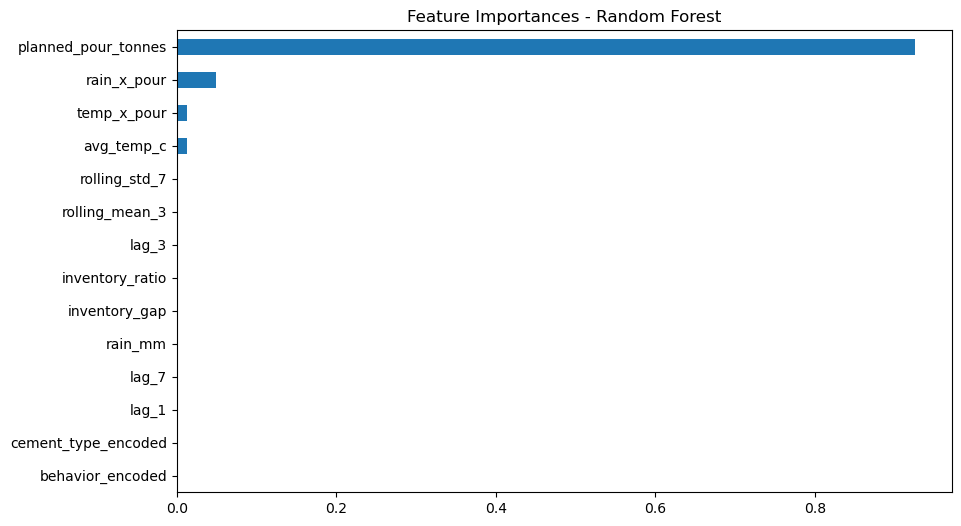

In [83]:
importances = pd.Series(rf2.feature_importances_, index=features).sort_values()
importances.plot(kind='barh', figsize=(10,6), title='Feature Importances - Random Forest')